# Capstone Project -Battle of Neighborhoods- Place to live in Amsterdam

## Topic: Finding the best place to live in Amsterdam when being on a work assignment

## Date: 02 April 2020
### Author: Ronald de Lange

#### 1. Description of the Problem

I work in Amsterdam as a manager for an international company. Once every while we have international assignments within our organisation. I often get the question from the assignee what the best place would be to look for an house or apartment in Amsterdam.

Most of the time I propose to jointly discuss the possibilities, with the map of Amsterdam in front of us.

It is not easy to find a place to live in Amsterdam. In order to be able to focus on a specific area, it would be benefitial to understand the characteristics of all the areas. This will enable drilling down on the areas which suits most. As part of this project I **explore different neighborhoods of Amsterdam and find the best area to look for a place to live for international assignees**.     

From the assignee perspective, a lot of factors come into play when finding the best accommodation. This study will focus on the following characteristics of the neighbourhoods in Amsterdam:
* the safety
* the general atmosphere
* the house density
* amount of households with children in the neighbourhood
* the population density in the neighbourhood

In order to make sure that every individual assignee will get a specific advice **I included a questionaire** in the notebook where the assignee can rate the importance of **specific characteristics** to him/her. I will use this input to weight the different characteristics into a final score per neighbourhood. Based on the final scores, **a top 5 of Neighbourhoods is adviced.** for this specific international assignee.

#### 2. Data Acquisition and Preprocessing
This project will use a couple of sources of data:
* Dataset of Amsterdam Neighbourhood characterictics
* Dataset with safety index for Amsterdam Neighbourhoods
* List of Neighbourhoods in Amsterdam
* Foursquare data via the API

**2.1. Amsterdam Neighbourhood data**   
* Data from the city of Amsterdam, with different characterictics of the Neighbourhood   
* source: Amsterdam Datastore   
* url: https://api.data.amsterdam.nl/dcatd/datasets/G5JpqNbhweXZSw/purls/NlraIEidgfbWGw

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read data as published by Amsterdam (the full set)
# In the next steps we will filter the information we need for the analysis
Adamfull = pd.read_excel('2020_BBGA_0303.xlsx', index_col=0)
Adamfull.head()

,niveaunaam,SD,sdnaam,gebiedcode15,gebiedcodenaam,gebiednaam,GSD,jaar,BEVTOTAAL,BEV_PROG2015,...,SK017_KWETS34,SK017_KWETS34_P,SK1826_KWETS34,SK1826_KWETS34_P,SK2765_KWETS34,SK2765_KWETS34_P,SK66PLUS_KWETS34,SK66PLUS_KWETS34_P,SKACTI,SKACTI_1000INW
niveau,,,,,,,,,,,,,,,,,,,,,
1,Amsterdam,S,Amsterdam,STAD,Amsterdam,Amsterdam,NaN,2040.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Stadsdelen,A,A Centrum,A,A Centrum,Centrum,NaN,2040.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Stadsdelen,B,B Westpoort,B,B Westpoort,Westpoort,NaN,2040.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Stadsdelen,E,E West,E,E West,West,NaN,2040.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Stadsdelen,F,F Nieuw-West,F,F Nieuw-West,Nieuw-West,NaN,2040.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
Adamfull.shape

(19161, 805)

In [3]:
# As we will focus on Neighbourhoods, we will only keep data related to Neighbourhood (Wijken in Dutch) level
Adamneighbourhood = Adamfull[Adamfull.niveaunaam == 'Wijken']
Adamneighbourhood.head()

,niveaunaam,SD,sdnaam,gebiedcode15,gebiedcodenaam,gebiednaam,GSD,jaar,BEVTOTAAL,BEV_PROG2015,...,SK017_KWETS34,SK017_KWETS34_P,SK1826_KWETS34,SK1826_KWETS34_P,SK2765_KWETS34,SK2765_KWETS34_P,SK66PLUS_KWETS34,SK66PLUS_KWETS34_P,SKACTI,SKACTI_1000INW
niveau,,,,,,,,,,,,,,,,,,,,,
4,Wijken,A,A Centrum,A00,A00 Burgwallen-Oude Zijde,Burgwallen-Oude Zijde,1.0,2040.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Wijken,A,A Centrum,A01,A01 Burgwallen-Nieuwe Zijde,Burgwallen-Nieuwe Zijde,1.0,2040.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Wijken,A,A Centrum,A02,A02 Grachtengordel-West,Grachtengordel-West,1.0,2040.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Wijken,A,A Centrum,A03,A03 Grachtengordel-Zuid,Grachtengordel-Zuid,2.0,2040.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Wijken,A,A Centrum,A04,A04 Nieuwmarkt/Lastage,Nieuwmarkt/Lastage,2.0,2040.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Now we make sure we only keep actual figures, filtering all years out except for 2020
Adamnbrh2020 = Adamneighbourhood[Adamneighbourhood.jaar == 2020]
Adamnbrh2020.head()
Adamnbrh2020.shape

(100, 805)

In [5]:
fields_to_use = ['sdnaam','gebiedcode15','gebiednaam','jaar','BEVTOTAAL','BEVDICHT','BEVHHMKIND_P','WDICHT']
Adamnbrh2020_final = Adamnbrh2020.filter(fields_to_use, axis=1)
Adamnbrh2020_final.set_index('gebiedcode15',inplace = True, append=False)
Adamnbrh2020_final.head()

,sdnaam,gebiednaam,jaar,BEVTOTAAL,BEVDICHT,BEVHHMKIND_P,WDICHT
gebiedcode15,,,,,,,
A00,A Centrum,Burgwallen-Oude Zijde,2020.0,4465.0,12814.0,7.9,8524.0
A01,A Centrum,Burgwallen-Nieuwe Zijde,2020.0,4134.0,7374.0,6.9,5282.0
A02,A Centrum,Grachtengordel-West,2020.0,6440.0,14382.0,12.7,9621.0
A03,A Centrum,Grachtengordel-Zuid,2020.0,5436.0,10457.0,14.0,6708.0
A04,A Centrum,Nieuwmarkt/Lastage,2020.0,9703.0,13969.0,13.2,8952.0


**2.2. Amsterdam Safety data**   
* Data from the city of Amsterdam, providing a safety index per Neighbourhood, based on #crimes etc   
* It is reported as an index. 
* A score under 100 makes a neighbourhood relatively safe, a score above 100 relative unsafe.
* source: Amsterdam Datastore   
* url: https://api.data.amsterdam.nl/dcatd/datasets/dNpsaDrPK7yDmg/purls/6

In [6]:
#Safety data
Adamsafety = pd.read_excel('2019_stadsdelen_2_06_.xlsx')
#Rename Index
Adamsafety.rename(columns={'Wijknummer':'gebiedcode15'}, inplace=True)
Adamsafety.set_index('gebiedcode15',inplace = True, append=False)
Adamsafety.head()

,Wijken,2014,2015,2016,2017,2018
gebiedcode15,,,,,,
A00,A00 Burgwallen-Oude Zijde,76.0,50.0,82.0,112.0,74
A01,A01 Burgwallen-Nieuwe Zijde,77.0,78.0,70.0,67.0,85
A02,A02 Grachtengordel-West,35.0,56.0,38.0,42.0,70
A03,A03 Grachtengordel-Zuid,77.0,57.0,40.0,73.0,65
A04,A04 Nieuwmarkt/Lastage,64.0,71.0,75.0,68.0,68


In [7]:
# Only use the latest info available (2018)
Adamsafety_final=Adamsafety.filter(['Wijknummer',2018], axis=1)
Adamsafety_final.head()

,2018
gebiedcode15,
A00,74
A01,85
A02,70
A03,65
A04,68


In [8]:
# We merge the dataframes based on index (gebiedcode)
AdamData = Adamnbrh2020_final.merge(Adamsafety_final, left_index=True, right_index=True)
AdamData.rename(columns={2018:'SAFETY_INDEX'}, inplace=True)
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 200)
AdamData.head()

,sdnaam,gebiednaam,jaar,BEVTOTAAL,BEVDICHT,BEVHHMKIND_P,WDICHT,SAFETY_INDEX
gebiedcode15,,,,,,,,
A00,A Centrum,Burgwallen-Oude Zijde,2020.0,4465.0,12814.0,7.9,8524.0,74
A01,A Centrum,Burgwallen-Nieuwe Zijde,2020.0,4134.0,7374.0,6.9,5282.0,85
A02,A Centrum,Grachtengordel-West,2020.0,6440.0,14382.0,12.7,9621.0,70
A03,A Centrum,Grachtengordel-Zuid,2020.0,5436.0,10457.0,14.0,6708.0,65
A04,A Centrum,Nieuwmarkt/Lastage,2020.0,9703.0,13969.0,13.2,8952.0,68


In [9]:
# make sure the SAFETY_INDEX field is float
AdamData['SAFETY_INDEX'] = AdamData['SAFETY_INDEX'].astype(np.float64)


In [10]:
# Lets give meaningfull columnames
AdamData.reset_index(inplace=True)
AdamData.rename(columns={'gebiedcode15':'NeighbourhoodID','sdnaam':'Borough','gebiednaam':'Neighbourhood','jaar':'Year','BEVTOTAAL':'Population_Total','BEVDICHT':'Population_Density','BEVHHMKIND_P':'HouseHolds_with_Children_Percentage','WDICHT':'House_Density'}, inplace=True)
AdamData.set_index('NeighbourhoodID',inplace = True, append=False)
AdamData.head()

,Borough,Neighbourhood,Year,Population_Total,Population_Density,HouseHolds_with_Children_Percentage,House_Density,SAFETY_INDEX
NeighbourhoodID,,,,,,,,
A00,A Centrum,Burgwallen-Oude Zijde,2020.0,4465.0,12814.0,7.9,8524.0,74.0
A01,A Centrum,Burgwallen-Nieuwe Zijde,2020.0,4134.0,7374.0,6.9,5282.0,85.0
A02,A Centrum,Grachtengordel-West,2020.0,6440.0,14382.0,12.7,9621.0,70.0
A03,A Centrum,Grachtengordel-Zuid,2020.0,5436.0,10457.0,14.0,6708.0,65.0
A04,A Centrum,Nieuwmarkt/Lastage,2020.0,9703.0,13969.0,13.2,8952.0,68.0


**2.3. Amsterdam GEO data**   
* Data from the city of Amsterdam, providing geo data per Neighbourhood
* source: Amsterdam Datastore

In [11]:
# Now we load the Neighbourhood GEO location to add to the table
NB_GEO = pd.read_csv("GEBIED_BUURTEN.csv",sep=';')
# keep relevant colums
fields_to_use = ['Buurtcombinatie_code','LNG','LAT']
NB_GEO = NB_GEO.filter(fields_to_use, axis=1)
NB_GEO = NB_GEO.groupby('Buurtcombinatie_code').mean()
NB_GEO.reset_index(inplace=True)
NB_GEO.rename(columns={'Buurtcombinatie_code':'NeighbourhoodID'}, inplace=True)
NB_GEO.set_index('NeighbourhoodID',inplace = True, append=False)
NB_GEO.head()

,LNG,LAT
NeighbourhoodID,,
A00,4.896898,52.372560
A01,4.893655,52.374241
A02,4.887073,52.373251
A03,4.892358,52.365285
A04,4.904794,52.371762


In [12]:
# Add locationdata to the already available DataFrame
AdamData_final = AdamData.merge(NB_GEO, left_index=True, right_index=True)
AdamData_final.head()

,Borough,Neighbourhood,Year,Population_Total,Population_Density,HouseHolds_with_Children_Percentage,House_Density,SAFETY_INDEX,LNG,LAT
NeighbourhoodID,,,,,,,,,,
A00,A Centrum,Burgwallen-Oude Zijde,2020.0,4465.0,12814.0,7.9,8524.0,74.0,4.896898,52.372560
A01,A Centrum,Burgwallen-Nieuwe Zijde,2020.0,4134.0,7374.0,6.9,5282.0,85.0,4.893655,52.374241
A02,A Centrum,Grachtengordel-West,2020.0,6440.0,14382.0,12.7,9621.0,70.0,4.887073,52.373251
A03,A Centrum,Grachtengordel-Zuid,2020.0,5436.0,10457.0,14.0,6708.0,65.0,4.892358,52.365285
A04,A Centrum,Nieuwmarkt/Lastage,2020.0,9703.0,13969.0,13.2,8952.0,68.0,4.904794,52.371762


**2.4. Amsterdam Foursquare data**   
* Data about venues in Amsterdam, pulled from the Foursquare datalake via its API

In [13]:
import requests

In [14]:
# Foursquare credentials
CLIENT_ID = '1QKLLOY0EFNHGROZEEWYO4UOL0UIXTNMK1JB0F5N0PAJF11G' # your Foursquare ID
CLIENT_SECRET = 'I4UPAAQ4XT0FL2R4VC14KSNQ34IITWYY5MADK3QD5CSFIS1V' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [15]:
#Create a function to explore all Neighbourhoods
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
LIMIT = 50
venues = getNearbyVenues(names=AdamData_final['Neighbourhood'],
                                   latitudes=AdamData_final['LAT'],
                                   longitudes=AdamData_final['LNG']
                                  )

Burgwallen-Oude Zijde
Burgwallen-Nieuwe Zijde
Grachtengordel-West
Grachtengordel-Zuid
Nieuwmarkt/Lastage
Haarlemmerbuurt
Jordaan
De Weteringschans
Weesperbuurt/Plantage
Oostelijke Eilanden/Kadijken
Houthavens
Spaarndammer- en Zeeheldenbuurt
Staatsliedenbuurt
Centrale Markt
Frederik Hendrikbuurt
Da Costabuurt
Kinkerbuurt
Van Lennepbuurt
Helmersbuurt
Vondelbuurt
Sloterdijk
Landlust
Erasmuspark
De Kolenkit
Geuzenbuurt
Van Galenbuurt
Hoofdweg e.o.
Westindische Buurt
Slotermeer-Noordoost
Slotermeer-Zuidwest
Geuzenveld
Osdorp-Oost
Osdorp-Midden
De Punt
Middelveldsche Akerpolder
Slotervaart Noord
Overtoomse Veld
Westlandgracht
Sloter/Riekerpolder
Zuidas
Oude Pijp
Nieuwe Pijp
Zuid Pijp
Hoofddorppleinbuurt
Schinkelbuurt
Willemspark
Museumkwartier
Stadionbuurt
Apollobuurt
Scheldebuurt
IJselbuurt
Rijnbuurt
Prinses Irenebuurt e.o.
Buitenveldert-West
Buitenveldert-Oost
Weesperzijde
Oosterparkbuurt
Dapperbuurt
Transvaalbuurt
Indische Buurt West
Indische Buurt Oost
Oostelijk Havengebied
Zeeburgereila

In [17]:
print(venues.shape)
venues.head()

(2567, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Burgwallen-Oude Zijde,52.37256,4.896898,Rosalia's Menagerie,52.371678,4.899174,Cocktail Bar
1,Burgwallen-Oude Zijde,52.37256,4.896898,De Koffieschenkerij,52.374043,4.898427,Coffee Shop
2,Burgwallen-Oude Zijde,52.37256,4.896898,Sofitel Legend The Grand Amsterdam,52.371093,4.895410,Hotel
3,Burgwallen-Oude Zijde,52.37256,4.896898,Wynand Fockink,52.372301,4.895253,Liquor Store
4,Burgwallen-Oude Zijde,52.37256,4.896898,Dam,52.372824,4.893702,Plaza


#### 3. Methodology
In this section, we will explore the in depth using different visualizations. Finally we will conduct cluster analysis to classify the neighbourhoods into different levels of characteristics.

**3.1. Exploratory Analysis**

In [18]:
#Review our data
AdamData_final.head()

,Borough,Neighbourhood,Year,Population_Total,Population_Density,HouseHolds_with_Children_Percentage,House_Density,SAFETY_INDEX,LNG,LAT
NeighbourhoodID,,,,,,,,,,
A00,A Centrum,Burgwallen-Oude Zijde,2020.0,4465.0,12814.0,7.9,8524.0,74.0,4.896898,52.372560
A01,A Centrum,Burgwallen-Nieuwe Zijde,2020.0,4134.0,7374.0,6.9,5282.0,85.0,4.893655,52.374241
A02,A Centrum,Grachtengordel-West,2020.0,6440.0,14382.0,12.7,9621.0,70.0,4.887073,52.373251
A03,A Centrum,Grachtengordel-Zuid,2020.0,5436.0,10457.0,14.0,6708.0,65.0,4.892358,52.365285
A04,A Centrum,Nieuwmarkt/Lastage,2020.0,9703.0,13969.0,13.2,8952.0,68.0,4.904794,52.371762


In [19]:
venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Burgwallen-Oude Zijde,52.37256,4.896898,Rosalia's Menagerie,52.371678,4.899174,Cocktail Bar
1,Burgwallen-Oude Zijde,52.37256,4.896898,De Koffieschenkerij,52.374043,4.898427,Coffee Shop
2,Burgwallen-Oude Zijde,52.37256,4.896898,Sofitel Legend The Grand Amsterdam,52.371093,4.895410,Hotel
3,Burgwallen-Oude Zijde,52.37256,4.896898,Wynand Fockink,52.372301,4.895253,Liquor Store
4,Burgwallen-Oude Zijde,52.37256,4.896898,Dam,52.372824,4.893702,Plaza


In [20]:
import matplotlib.pyplot as plt

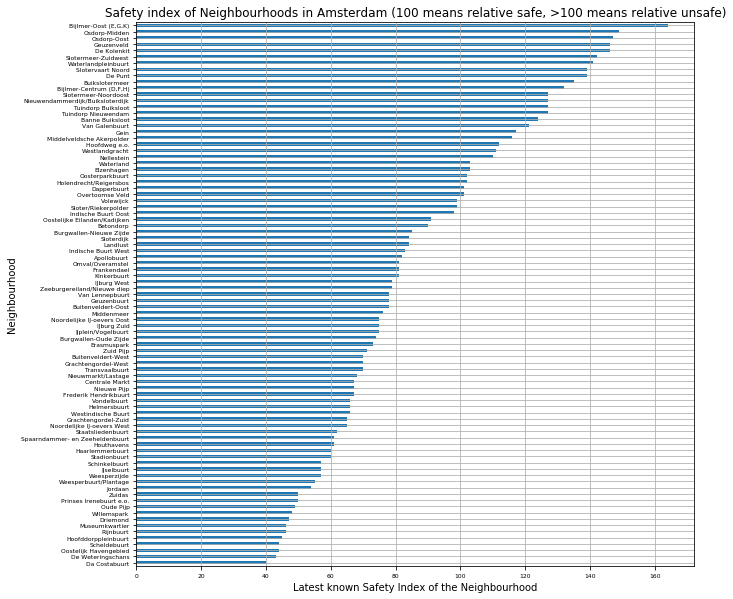

In [21]:
#Visualize safety data
AdamData_final.set_index('Neighbourhood')['SAFETY_INDEX'].sort_values().plot(kind='barh', grid=True, figsize=(10,10),fontsize=6)
plt.xlabel('Latest known Safety Index of the Neighbourhood')
plt.title('Safety index of Neighbourhoods in Amsterdam (100 means relative safe, >100 means relative unsafe)')
plt.show()

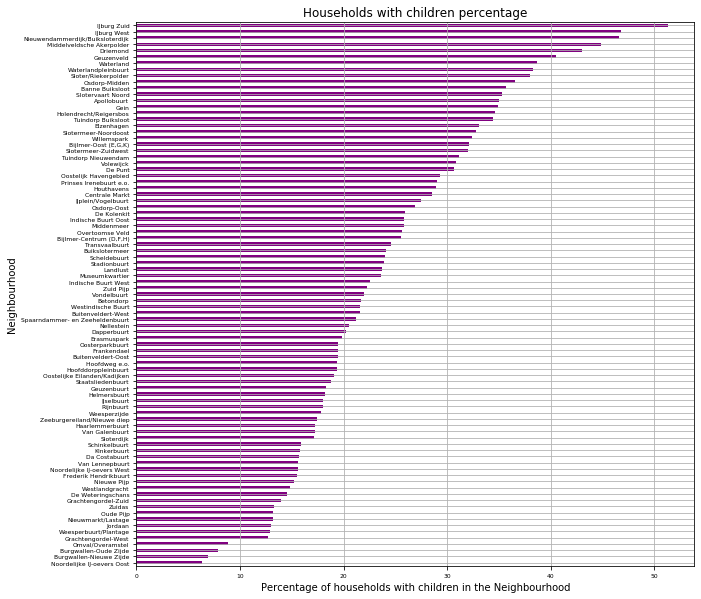

In [114]:
#Visualize households with children data
AdamData_final.set_index('Neighbourhood')['HouseHolds_with_Children_Percentage'].sort_values().plot(kind='barh', color="purple", grid=True, figsize=(10,10),fontsize=6)
plt.xlabel('Percentage of households with children in the Neighbourhood')
plt.title('Households with children percentage')
plt.show()

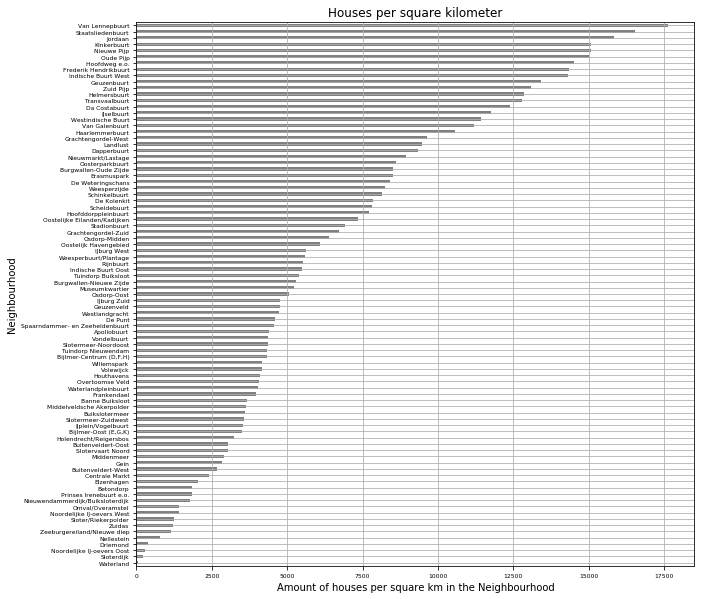

In [118]:
#Visualize house density
AdamData_final.set_index('Neighbourhood')['House_Density'].sort_values().plot(kind='barh', color="grey",grid=True, figsize=(10,10),fontsize=6)
plt.xlabel('Amount of houses per square km in the Neighbourhood')
plt.title('Houses per square kilometer')
plt.show()

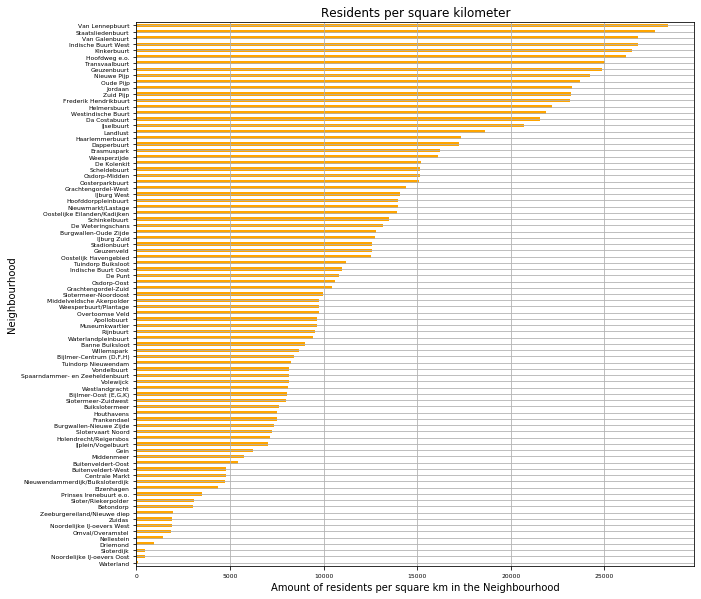

In [115]:
#Visualize house density
AdamData_final.set_index('Neighbourhood')['Population_Density'].sort_values().plot(kind='barh', color="orange",grid=True, figsize=(10,10),fontsize=6)
plt.xlabel('Amount of residents per square km in the Neighbourhood')
plt.title('Residents per square kilometer')
plt.show()

In [22]:
import folium
from geopy.geocoders import Nominatim

In [23]:
#Get coordinates of Amsterdam
address = 'Amsterdam, NL'

geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Amsterdam are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Amsterdam are 52.3727598, 4.8936041.


In [24]:
# make a map of Amsterdam using folium
map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighbourhood in zip(AdamData_final['LAT'], AdamData_final['LNG'], AdamData_final['Neighbourhood']):
    label = '{}'.format(neighbourhood)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

**3.2. Cluster Analysis**   
In this part, we will conduct K-means clustering to group the neighbourhoods according to what convenience facilities they have using Foursquare data.

In [25]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 291 uniques categories.


In [26]:
# One hot encoding before clustering
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

In [27]:
# Add neighbourhood name back to dataframe
neighbourhood = venues['Neighbourhood']
onehot.insert(0, 'Neighbourhood', neighbourhood)
onehot.head()

,Neighbourhood,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,...,Train Station,Tram Station,Tunnel,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Windmill,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Burgwallen-Oude Zijde,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Burgwallen-Oude Zijde,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Burgwallen-Oude Zijde,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Burgwallen-Oude Zijde,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Burgwallen-Oude Zijde,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
onehot.shape

(2567, 292)

In [29]:
# Group rows by neighbourhood and take the mean of frequency of each venue category
grouped = onehot.groupby('Neighbourhood').mean().reset_index()
grouped

,Neighbourhood,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,...,Train Station,Tram Station,Tunnel,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Windmill,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Apollobuurt,0.00,0.00,0.00,0.00,0.00,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.047619,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.047619,0.00,0.000000,0.00,0.0
1,Banne Buiksloot,0.00,0.00,0.00,0.00,0.00,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.090909,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.0
2,Betondorp,0.00,0.00,0.00,0.00,0.00,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.0
3,"Bijlmer-Centrum (D,F,H)",0.00,0.00,0.00,0.00,0.00,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.020833,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.020833,0.00,0.020833,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.0
4,"Bijlmer-Oost (E,G,K)",0.00,0.00,0.00,0.00,0.00,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.066667,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.0
5,Buikslotermeer,0.00,0.00,0.00,0.00,0.00,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.033333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.0
6,Buitenveldert-Oost,0.00,0.00,0.00,0.00,0.00,0.000000,0.000,0.055556,0.00,0.000000,0.000000,0.055556,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.0
7,Buitenveldert-West,0.00,0.00,0.00,0.00,0.00,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.0
8,Burgwallen-Nieuwe Zijde,0.00,0.00,0.00,0.00,0.00,0.020000,0.020,0.020000,0.02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.0
9,Burgwallen-Oude Zijde,0.00,0.00,0.00,0.00,0.00,0.020000,0.020,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.020000,0.000000,0.00,0.000000,0.00,0.0


In [30]:
# top 5 venues for each neighbourhood
num_top_venues = 5

for hood in grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = grouped[grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Apollobuurt----
                venue  freq
0               Hotel  0.14
1  Italian Restaurant  0.10
2        Tram Station  0.05
3         Comedy Club  0.05
4                Park  0.05


----Banne Buiksloot----
                venue  freq
0            Bus Stop  0.27
1                Park  0.18
2  Turkish Restaurant  0.09
3              Bakery  0.09
4              Church  0.09


----Betondorp----
          venue  freq
0        Bakery  0.25
1  Neighborhood  0.25
2        Market  0.25
3           Bar  0.25
4   Music Store  0.00


----Bijlmer-Centrum (D,F,H)----
                venue  freq
0              Bakery  0.06
1                Park  0.06
2  Chinese Restaurant  0.06
3      Clothing Store  0.06
4  Italian Restaurant  0.04


----Bijlmer-Oost (E,G,K)----
                       venue  freq
0                Supermarket  0.13
1          Food & Drink Shop  0.07
2  Middle Eastern Restaurant  0.07
3                     Bakery  0.07
4       Fast Food Restaurant  0.07


----Buikslotermeer---

In [84]:
# Put into pandas dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Neighbourhood'] = grouped['Neighbourhood']

for ind in np.arange(grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Apollobuurt,Hotel,Italian Restaurant,Comedy Club,French Restaurant,Café,Bistro,Baby Store,Juice Bar,Bus Stop,Park
1,Banne Buiksloot,Bus Stop,Park,Turkish Restaurant,Restaurant,Supermarket,Church,Shopping Mall,Bakery,Event Space,Ethiopian Restaurant
2,Betondorp,Market,Neighborhood,Bar,Bakery,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Flower Shop
3,"Bijlmer-Centrum (D,F,H)",Park,Clothing Store,Chinese Restaurant,Bakery,Fast Food Restaurant,Plaza,Italian Restaurant,Supermarket,Hostel,Mediterranean Restaurant
4,"Bijlmer-Oost (E,G,K)",Supermarket,Bakery,Chinese Restaurant,Middle Eastern Restaurant,Metro Station,Fast Food Restaurant,Snack Place,Food & Drink Shop,Shopping Mall,Bus Stop


In [32]:
# K Means Clustering
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

In [85]:
kclusters = 5
amsterdam_cluster = grouped.drop('Neighbourhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(amsterdam_cluster)

kmeans.labels_[0:10] 

array([3, 0, 3, 3, 0, 3, 3, 3, 3, 3], dtype=int32)

In [86]:
# add clustering labels
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# merge neighbourhood_grouped with amsterdam coords to add latitude/longitude for each neighbourhood
amsterdam_merged = AdamData_final
amsterdam_merged = amsterdam_merged.join(venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

amsterdam_merged.head()

,Borough,Neighbourhood,Year,Population_Total,Population_Density,HouseHolds_with_Children_Percentage,House_Density,SAFETY_INDEX,LNG,LAT,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
NeighbourhoodID,,,,,,,,,,,,,,,,,,,,,
A00,A Centrum,Burgwallen-Oude Zijde,2020.0,4465.0,12814.0,7.9,8524.0,74.0,4.896898,52.372560,3,Bar,Hotel,Marijuana Dispensary,Coffee Shop,Café,Bakery,Dessert Shop,Plaza,Seafood Restaurant,Museum
A01,A Centrum,Burgwallen-Nieuwe Zijde,2020.0,4134.0,7374.0,6.9,5282.0,85.0,4.893655,52.374241,3,Bar,Coffee Shop,Hotel,Café,Cocktail Bar,Clothing Store,Dessert Shop,Salon / Barbershop,Hotel Bar,Science Museum
A02,A Centrum,Grachtengordel-West,2020.0,6440.0,14382.0,12.7,9621.0,70.0,4.887073,52.373251,3,Hotel,Café,Marijuana Dispensary,Bar,Coffee Shop,Italian Restaurant,Dessert Shop,Bakery,French Restaurant,Steakhouse
A03,A Centrum,Grachtengordel-Zuid,2020.0,5436.0,10457.0,14.0,6708.0,65.0,4.892358,52.365285,3,Italian Restaurant,Hotel,Café,Restaurant,Burger Joint,Clothing Store,Marijuana Dispensary,Movie Theater,Food Truck,Museum
A04,A Centrum,Nieuwmarkt/Lastage,2020.0,9703.0,13969.0,13.2,8952.0,68.0,4.904794,52.371762,3,Bar,Hotel,Marijuana Dispensary,Café,Bagel Shop,Cocktail Bar,Record Shop,Grocery Store,Mediterranean Restaurant,Mexican Restaurant


In [87]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(amsterdam_merged['LAT'], amsterdam_merged['LNG'], amsterdam_merged['Neighbourhood'], amsterdam_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Now let's further explore each clusters and name them according to their characteristics

In [88]:
# Cluster 0: Busy area (Coffee shops, Clothing stores)
amsterdam_merged.loc[amsterdam_merged['Cluster Labels'] == 0, amsterdam_merged.columns[[0] + list(range(5, amsterdam_merged.shape[1]))]]

,Borough,HouseHolds_with_Children_Percentage,House_Density,SAFETY_INDEX,LNG,LAT,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
NeighbourhoodID,,,,,,,,,,,,,,,,,
E36,E West,17.1,204.0,84.0,4.853234,52.389607,0,Nightclub,Park,Bus Stop,Climbing Gym,Music Venue,Seafood Restaurant,Dog Run,Trail,Bakery,Fast Food Restaurant
E39,E West,25.9,7853.0,146.0,4.841405,52.376981,0,Park,Restaurant,Bus Stop,Fast Food Restaurant,Supermarket,Metro Station,Bagel Shop,Plaza,Climbing Gym,Drugstore
F78,F Nieuw-West,40.5,4746.0,146.0,4.802849,52.378967,0,Bus Stop,Supermarket,Tram Station,Grocery Store,Bakery,Snack Place,Market,Park,Turkish Restaurant,Drugstore
F81,F Nieuw-West,26.9,5045.0,147.0,4.806869,52.358827,0,Clothing Store,Turkish Restaurant,Tram Station,Supermarket,Theater,Snack Place,Shopping Mall,Drugstore,Food Truck,Food & Drink Shop
F82,F Nieuw-West,36.5,6379.0,149.0,4.794732,52.356743,0,Turkish Restaurant,Park,Dessert Shop,Sushi Restaurant,Ice Cream Shop,Snack Place,Supermarket,Indonesian Restaurant,Event Space,Eastern European Restaurant
F84,F Nieuw-West,44.8,3633.0,116.0,4.781582,52.350398,0,Tram Station,Pizza Place,Snack Place,Tea Room,Supermarket,Drugstore,Pharmacy,Boat or Ferry,Farm,Farmers Market
F86,F Nieuw-West,25.6,4070.0,101.0,4.840917,52.364443,0,Supermarket,Bus Stop,Gym,Hotel,Lounge,Farm,Nightclub,Restaurant,Park,Grocery Store
F88,F Nieuw-West,38.0,1251.0,99.0,4.813893,52.342817,0,Tram Station,Gym,Bookstore,Flower Shop,Sports Bar,Bus Stop,Supermarket,Furniture / Home Store,Drugstore,Other Great Outdoors
M32,M Oost,25.8,5492.0,98.0,4.947890,52.363297,0,Bus Stop,Gym / Fitness Center,Tram Station,Playground,Plaza,Pool,Distillery,Park,Dumpling Restaurant,Dutch Restaurant


In [89]:
# Cluster 1: Healthy area
amsterdam_merged.loc[amsterdam_merged['Cluster Labels'] == 1, amsterdam_merged.columns[[0] + list(range(5, amsterdam_merged.shape[1]))]]

,Borough,HouseHolds_with_Children_Percentage,House_Density,SAFETY_INDEX,LNG,LAT,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
NeighbourhoodID,,,,,,,,,,,,,,,,,
N73,N Noord,38.7,37.0,103.0,4.979187,52.392644,1,Bike Trail,Athletics & Sports,Zoo Exhibit,Falafel Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit


In [90]:
# Cluster 2: Harbor area
amsterdam_merged.loc[amsterdam_merged['Cluster Labels'] == 2, amsterdam_merged.columns[[0] + list(range(5, amsterdam_merged.shape[1]))]]

,Borough,HouseHolds_with_Children_Percentage,House_Density,SAFETY_INDEX,LNG,LAT,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
NeighbourhoodID,,,,,,,,,,,,,,,,,
M34,M Oost,17.4,1141.0,79.0,4.969712,52.368609,2,Harbor / Marina,Gas Station,Café,Tram Station,Drugstore,Dutch Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant


In [91]:
# Cluster 3: Lively area (Pubs, Restaurants)
amsterdam_merged.loc[amsterdam_merged['Cluster Labels'] == 3, amsterdam_merged.columns[[0] + list(range(5, amsterdam_merged.shape[1]))]]

,Borough,HouseHolds_with_Children_Percentage,House_Density,SAFETY_INDEX,LNG,LAT,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
NeighbourhoodID,,,,,,,,,,,,,,,,,
A00,A Centrum,7.9,8524.0,74.0,4.896898,52.372560,3,Bar,Hotel,Marijuana Dispensary,Coffee Shop,Café,Bakery,Dessert Shop,Plaza,Seafood Restaurant,Museum
A01,A Centrum,6.9,5282.0,85.0,4.893655,52.374241,3,Bar,Coffee Shop,Hotel,Café,Cocktail Bar,Clothing Store,Dessert Shop,Salon / Barbershop,Hotel Bar,Science Museum
A02,A Centrum,12.7,9621.0,70.0,4.887073,52.373251,3,Hotel,Café,Marijuana Dispensary,Bar,Coffee Shop,Italian Restaurant,Dessert Shop,Bakery,French Restaurant,Steakhouse
A03,A Centrum,14.0,6708.0,65.0,4.892358,52.365285,3,Italian Restaurant,Hotel,Café,Restaurant,Burger Joint,Clothing Store,Marijuana Dispensary,Movie Theater,Food Truck,Museum
A04,A Centrum,13.2,8952.0,68.0,4.904794,52.371762,3,Bar,Hotel,Marijuana Dispensary,Café,Bagel Shop,Cocktail Bar,Record Shop,Grocery Store,Mediterranean Restaurant,Mexican Restaurant
A05,A Centrum,17.2,10556.0,60.0,4.887972,52.384215,3,Bar,Italian Restaurant,Plaza,Yoga Studio,Sandwich Place,Organic Grocery,Café,Bagel Shop,Marijuana Dispensary,Coffee Shop
A06,A Centrum,13.0,15844.0,54.0,4.880038,52.374337,3,Bar,Café,Yoga Studio,Hotel,Italian Restaurant,Coffee Shop,Cupcake Shop,Steakhouse,Juice Bar,Salon / Barbershop
A07,A Centrum,14.5,8402.0,43.0,4.889508,52.362182,3,Bar,Coffee Shop,Art Museum,Steakhouse,Café,Italian Restaurant,Beer Garden,Canal,Library,Burger Joint
A08,A Centrum,12.9,5601.0,55.0,4.912922,52.363917,3,Zoo Exhibit,Bar,Restaurant,Hotel,Museum,Pizza Place,Breakfast Spot,Gym / Fitness Center,Indonesian Restaurant,Burger Joint


In [92]:
# Cluster 4: Quiet area
amsterdam_merged.loc[amsterdam_merged['Cluster Labels'] == 4, amsterdam_merged.columns[[0] + list(range(5, amsterdam_merged.shape[1]))]]

,Borough,HouseHolds_with_Children_Percentage,House_Density,SAFETY_INDEX,LNG,LAT,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
NeighbourhoodID,,,,,,,,,,,,,,,,,
N63,N Noord,34.4,5407.0,127.0,4.929079,52.393208,4,Campground,Ice Cream Shop,Pharmacy,Health & Beauty Service,Park,Rest Area,Ethiopian Restaurant,Dumpling Restaurant,Dutch Restaurant,Eastern European Restaurant
N64,N Noord,46.6,1788.0,127.0,4.932702,52.393161,4,Bar,Tennis Court,Park,Campground,Event Space,Dutch Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant


#### 4. Results & Recommendation

We have now all data available, analysed and cleaned to be able to advice the international assignee on a living area that fits his/her wishes based on rated characteristics by the assignee.

Our key criteria for the living area decision will be based on safety, atmosphere, amount of children, population density and house density.   

**4.1. Safety**   
Safety is determined by the safety index per neighbourhood as provided in a dataset by the city of Amsterdam

In [93]:
safetyscore = amsterdam_merged['SAFETY_INDEX']
amsterdam_merged.drop(['SAFETY_INDEX'], inplace=True, axis=1)
amsterdam_merged.insert(1, 'SAFETY_INDEX', safetyscore)
amsterdam_merged.sort_values(by='SAFETY_INDEX', ascending = False)

,Borough,SAFETY_INDEX,Neighbourhood,Year,Population_Total,Population_Density,HouseHolds_with_Children_Percentage,House_Density,LNG,LAT,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
NeighbourhoodID,,,,,,,,,,,,,,,,,,,,,
T94,T Zuidoost,164.0,"Bijlmer-Oost (E,G,K)",2020.0,29788.0,8047.0,32.1,3512.0,4.975828,52.318494,0,Supermarket,Bakery,Chinese Restaurant,Middle Eastern Restaurant,Metro Station,Fast Food Restaurant,Snack Place,Food & Drink Shop,Shopping Mall,Bus Stop
F82,F Nieuw-West,149.0,Osdorp-Midden,2020.0,15712.0,15150.0,36.5,6379.0,4.794732,52.356743,0,Turkish Restaurant,Park,Dessert Shop,Sushi Restaurant,Ice Cream Shop,Snack Place,Supermarket,Indonesian Restaurant,Event Space,Eastern European Restaurant
F81,F Nieuw-West,147.0,Osdorp-Oost,2020.0,16676.0,10611.0,26.9,5045.0,4.806869,52.358827,0,Clothing Store,Turkish Restaurant,Tram Station,Supermarket,Theater,Snack Place,Shopping Mall,Drugstore,Food Truck,Food & Drink Shop
E39,E West,146.0,De Kolenkit,2020.0,10724.0,15209.0,25.9,7853.0,4.841405,52.376981,0,Park,Restaurant,Bus Stop,Fast Food Restaurant,Supermarket,Metro Station,Bagel Shop,Plaza,Climbing Gym,Drugstore
F78,F Nieuw-West,146.0,Geuzenveld,2020.0,16535.0,12568.0,40.5,4746.0,4.802849,52.378967,0,Bus Stop,Supermarket,Tram Station,Grocery Store,Bakery,Snack Place,Market,Park,Turkish Restaurant,Drugstore
F77,F Nieuw-West,142.0,Slotermeer-Zuidwest,2020.0,18035.0,8002.0,32.0,3566.0,4.818824,52.374763,3,Sporting Goods Shop,Restaurant,Pool,Beach,Supermarket,Café,Greek Restaurant,Tram Station,Park,Plaza
N68,N Noord,141.0,Waterlandpleinbuurt,2020.0,13191.0,9447.0,38.3,4023.0,4.953775,52.394617,0,Bus Stop,Concert Hall,Grocery Store,Discount Store,Drugstore,Snack Place,Supermarket,Convenience Store,Indonesian Restaurant,Health & Beauty Service
F85,F Nieuw-West,139.0,Slotervaart Noord,2020.0,8137.0,7226.0,35.3,3046.0,4.825388,52.363199,3,Asian Restaurant,Martial Arts Dojo,Moroccan Restaurant,Indian Chinese Restaurant,Soccer Field,Bus Stop,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space
F83,F Nieuw-West,139.0,De Punt,2020.0,6228.0,10851.0,30.7,4596.0,4.784442,52.358587,3,Clothing Store,Hobby Shop,Sporting Goods Shop,Convenience Store,Pet Store,Discount Store,Café,Sandwich Place,Neighborhood,Electronics Store


**4.2.. Atmosphere**   
From the cluster analysis made above, we will catagorise the individual clusters according to the characteristics as provided by Foursquare for the popular venues.

According to my interpretation, **Cluster 0** is **'Busy Area'** with many coffee shops and clothing stores.

In [94]:
amsterdam_merged.loc[amsterdam_merged['Cluster Labels'] == 0].Neighbourhood.unique()

array(['Sloterdijk', 'De Kolenkit', 'Geuzenveld', 'Osdorp-Oost',
       'Osdorp-Midden', 'Middelveldsche Akerpolder', 'Overtoomse Veld',
       'Sloter/Riekerpolder', 'Indische Buurt Oost',
       'Waterlandpleinbuurt', 'Banne Buiksloot', 'Bijlmer-Oost (E,G,K)',
       'Holendrecht/Reigersbos', 'Gein'], dtype=object)

According to my interpretation, **Cluster 1** is **'Healthy Area'** with gyms, parks, pools and golf courses as popular places.

In [95]:
amsterdam_merged.loc[amsterdam_merged['Cluster Labels'] == 1].Neighbourhood.unique()

array(['Waterland'], dtype=object)

According to my interpretation, **Cluster 2** is **'Harbor Area'** with the traditional industry.

In [96]:
amsterdam_merged.loc[amsterdam_merged['Cluster Labels'] == 2].Neighbourhood.unique()

array(['Zeeburgereiland/Nieuwe diep'], dtype=object)

According to my interpretation, **Cluster 3** is **'Lively Area'** with many pubs and restaurants.

In [97]:
amsterdam_merged.loc[amsterdam_merged['Cluster Labels'] == 3].Neighbourhood.unique()

array(['Burgwallen-Oude Zijde', 'Burgwallen-Nieuwe Zijde',
       'Grachtengordel-West', 'Grachtengordel-Zuid', 'Nieuwmarkt/Lastage',
       'Haarlemmerbuurt', 'Jordaan', 'De Weteringschans',
       'Weesperbuurt/Plantage', 'Oostelijke Eilanden/Kadijken',
       'Houthavens', 'Spaarndammer- en Zeeheldenbuurt',
       'Staatsliedenbuurt', 'Centrale Markt', 'Frederik Hendrikbuurt',
       'Da Costabuurt', 'Kinkerbuurt', 'Van Lennepbuurt', 'Helmersbuurt',
       'Vondelbuurt', 'Landlust', 'Erasmuspark', 'Geuzenbuurt',
       'Van Galenbuurt', 'Hoofdweg e.o.', 'Westindische Buurt',
       'Slotermeer-Noordoost', 'Slotermeer-Zuidwest', 'De Punt',
       'Slotervaart Noord', 'Westlandgracht', 'Zuidas', 'Oude Pijp',
       'Nieuwe Pijp', 'Zuid Pijp', 'Hoofddorppleinbuurt', 'Schinkelbuurt',
       'Willemspark', 'Museumkwartier', 'Stadionbuurt', 'Apollobuurt',
       'Scheldebuurt', 'IJselbuurt', 'Rijnbuurt',
       'Prinses Irenebuurt e.o.', 'Buitenveldert-West',
       'Buitenveldert-Oost', 

According to my interpretation, **Cluster 4** is **'Quiet Area'** with cafe, bus stop, and yoga studio as top venues.

In [98]:
amsterdam_merged.loc[amsterdam_merged['Cluster Labels'] == 4].Neighbourhood.unique()

array(['Tuindorp Buiksloot', 'Nieuwendammerdijk/Buiksloterdijk'],
      dtype=object)

**4.3. Children - Population - Houses**   
We will use the figures as per the table from the city of Amsterdam for the factors Children %, Population per KM2 and Houses per KM2

**4.4. Weighted score table**   
We can now calculate the scores for each neigbourhood. The calculation is based on the figures we have derived from the source data, including th cluster analysis. On top of that the calculation is influanced by the rating the individual assignee will give as how important each of the characteristics is for him/her.

In [126]:
score = amsterdam_merged[['Neighbourhood','SAFETY_INDEX','HouseHolds_with_Children_Percentage','House_Density','Population_Density','Cluster Labels']].copy()
score.reset_index(inplace=True,drop=True)
score.head()

,Neighbourhood,SAFETY_INDEX,HouseHolds_with_Children_Percentage,House_Density,Population_Density,Cluster Labels
0,Burgwallen-Oude Zijde,74.0,7.9,8524.0,12814.0,3
1,Burgwallen-Nieuwe Zijde,85.0,6.9,5282.0,7374.0,3
2,Grachtengordel-West,70.0,12.7,9621.0,14382.0,3
3,Grachtengordel-Zuid,65.0,14.0,6708.0,10457.0,3
4,Nieuwmarkt/Lastage,68.0,13.2,8952.0,13969.0,3


In [127]:
# calculate the relative scores for safety, Households with children, House Density
score['Safety'] = (score['SAFETY_INDEX']-score['SAFETY_INDEX'].min())/(score['SAFETY_INDEX'].max()-score['SAFETY_INDEX'].min())
score['Safety'] = (score['Safety'] - 1) * -1
score['Children'] = (score['HouseHolds_with_Children_Percentage']-score['HouseHolds_with_Children_Percentage'].min())/(score['HouseHolds_with_Children_Percentage'].max()-score['HouseHolds_with_Children_Percentage'].min())
score['Children'] = (score['Children'] - 1) * -1
score['Houses'] = (score['House_Density']-score['House_Density'].min())/(score['House_Density'].max()-score['House_Density'].min())
score['Houses'] = (score['Houses'] - 1) * -1
score['Population'] = (score['Population_Density']-score['Population_Density'].min())/(score['Population_Density'].max()-score['Population_Density'].min())
score['Population'] = (score['Houses'] - 1) * -1
score.head()

,Neighbourhood,SAFETY_INDEX,HouseHolds_with_Children_Percentage,House_Density,Population_Density,Cluster Labels,Safety,Children,Houses,Population
0,Burgwallen-Oude Zijde,74.0,7.9,8524.0,12814.0,3,0.725806,0.964444,0.517483,0.482517
1,Burgwallen-Nieuwe Zijde,85.0,6.9,5282.0,7374.0,3,0.637097,0.986667,0.701802,0.298198
2,Grachtengordel-West,70.0,12.7,9621.0,14382.0,3,0.758065,0.857778,0.455114,0.544886
3,Grachtengordel-Zuid,65.0,14.0,6708.0,10457.0,3,0.798387,0.828889,0.620729,0.379271
4,Nieuwmarkt/Lastage,68.0,13.2,8952.0,13969.0,3,0.774194,0.846667,0.493149,0.506851


In [128]:
# start with a score of 0 for each of the characteristics
score['Rating_Atmosphere'] = 0
score['Rating_Safety'] = 0
score['Rating_Children'] = 0
score['Rating_Houses'] = 0
score['Rating_Population'] = 0

score.head()

,Neighbourhood,SAFETY_INDEX,HouseHolds_with_Children_Percentage,House_Density,Population_Density,Cluster Labels,Safety,Children,Houses,Population,Rating_Atmosphere,Rating_Safety,Rating_Children,Rating_Houses,Rating_Population
0,Burgwallen-Oude Zijde,74.0,7.9,8524.0,12814.0,3,0.725806,0.964444,0.517483,0.482517,0,0,0,0,0
1,Burgwallen-Nieuwe Zijde,85.0,6.9,5282.0,7374.0,3,0.637097,0.986667,0.701802,0.298198,0,0,0,0,0
2,Grachtengordel-West,70.0,12.7,9621.0,14382.0,3,0.758065,0.857778,0.455114,0.544886,0,0,0,0,0
3,Grachtengordel-Zuid,65.0,14.0,6708.0,10457.0,3,0.798387,0.828889,0.620729,0.379271,0,0,0,0,0
4,Nieuwmarkt/Lastage,68.0,13.2,8952.0,13969.0,3,0.774194,0.846667,0.493149,0.506851,0,0,0,0,0


**4.5. Questionaire to collect assignee view on importance of every item**   
Below questionaire will collect information from the assignee looking for a place to live in Amsterdam about his/her view on the importance of specific characterictics of a neighbourhood.

In [129]:
#questionaire
print("Please rate the following questions between 0 and 5")
print("Where 0 means the item does not infuance your preferred area") 
print("and 5 means it does heavily influance your preferred area.")
children_rating = input("Do you like an area with many children:")
safety_rating = input("Do you like an area with an high safety index:")
house_rating = input("Do you like an area with a lower house density:")
population_rating = input("Do you like an area with a lower population density:")
healthy_rating = input("Do you like an area with many health facilities like gymes:")
lively_rating = input("Do you like an area with many pubs and restaurants:")
busy_rating = input("Do you like an busy area with for instance many coffee shops and clothing stores:")
quiet_rating = input("Do you like a quiet area with for instance many yoga facilities:")
harbor_rating = input("Do you like to live in an area with traditional industries:")

Please rate the following questions between 0 and 5
Where 0 means the item does not infuance your preferred area
and 5 means it does heavily influance your preferred area.
Do you like an area with many children:5
Do you like an area with an high safety index:5
Do you like an area with a lower house density:4
Do you like an area with a lower population density:4
Do you like an area with many health facilities like gymes:2
Do you like an area with many pubs and restaurants:0
Do you like an busy area with for instance many coffee shops and clothing stores:0
Do you like a quiet area with for instance many yoga facilities:0
Do you like to live in an area with traditional industries:0


In [130]:
scorerows = len(score.index)
for i in range(scorerows):
    # Calculate Athmosphere Rating based on Cluster and personal rating
    if score.iloc[i,5] == 0:
        score.iloc[i,10] = int(busy_rating)/5
    elif score.iloc[i,5] == 3:
        score.iloc[i,10] = int(lively_rating)/5
    elif score.iloc[i,5] == 1:
        score.iloc[i,10] = int(healthy_rating)/5
    elif score.iloc[i,5] == 4:
        score.iloc[i,10] = int(quiet_rating)/5
    else:
        score.iloc[i,10] = int(harbor_rating)/5

    # Calculate Children rating based on Cluster and personal rating
    score.iloc[i,11] = (int(safety_rating)/5)*(1-score.iloc[i,6])
    score.iloc[i,12] = (int(children_rating)/5)*(1-score.iloc[i,7])
    score.iloc[i,13] = (int(house_rating)/5)*(score.iloc[i,8])
    score.iloc[i,14] = (int(population_rating)/5)*(score.iloc[i,9])

score.head(100)

,Neighbourhood,SAFETY_INDEX,HouseHolds_with_Children_Percentage,House_Density,Population_Density,Cluster Labels,Safety,Children,Houses,Population,Rating_Atmosphere,Rating_Safety,Rating_Children,Rating_Houses,Rating_Population
0,Burgwallen-Oude Zijde,74.0,7.9,8524.0,12814.0,3,0.725806,0.964444,0.517483,0.482517,0.0,0.274194,0.035556,0.413986,0.386014
1,Burgwallen-Nieuwe Zijde,85.0,6.9,5282.0,7374.0,3,0.637097,0.986667,0.701802,0.298198,0.0,0.362903,0.013333,0.561442,0.238558
2,Grachtengordel-West,70.0,12.7,9621.0,14382.0,3,0.758065,0.857778,0.455114,0.544886,0.0,0.241935,0.142222,0.364091,0.435909
3,Grachtengordel-Zuid,65.0,14.0,6708.0,10457.0,3,0.798387,0.828889,0.620729,0.379271,0.0,0.201613,0.171111,0.496583,0.303417
4,Nieuwmarkt/Lastage,68.0,13.2,8952.0,13969.0,3,0.774194,0.846667,0.493149,0.506851,0.0,0.225806,0.153333,0.394519,0.405481
5,Haarlemmerbuurt,60.0,17.2,10556.0,17320.0,3,0.838710,0.757778,0.401956,0.598044,0.0,0.161290,0.242222,0.321565,0.478435
6,Jordaan,54.0,13.0,15844.0,23293.0,3,0.887097,0.851111,0.101313,0.898687,0.0,0.112903,0.148889,0.081051,0.718949
7,De Weteringschans,43.0,14.5,8402.0,13173.0,3,0.975806,0.817778,0.524419,0.475581,0.0,0.024194,0.182222,0.419535,0.380465
8,Weesperbuurt/Plantage,55.0,12.9,5601.0,9764.0,3,0.879032,0.853333,0.683666,0.316334,0.0,0.120968,0.146667,0.546933,0.253067
9,Oostelijke Eilanden/Kadijken,91.0,19.1,7361.0,13911.0,3,0.588710,0.715556,0.583603,0.416397,0.0,0.411290,0.284444,0.466883,0.333117


In [131]:
# Drop the colums not needed anymore
score.drop(['SAFETY_INDEX'], inplace=True, axis=1)
score.drop(['Cluster Labels'], inplace=True, axis=1)
score.drop(['HouseHolds_with_Children_Percentage'], inplace=True, axis=1)
score.drop(['House_Density'], inplace=True, axis=1)
score.drop(['Population_Density'], inplace=True, axis=1)
score.drop(['Safety'], inplace=True, axis=1)
score.drop(['Children'], inplace=True, axis=1)
score.drop(['Houses'], inplace=True, axis=1)
score['Score'] = score['Rating_Atmosphere'] + score['Rating_Safety'] + score['Rating_Children'] + score['Rating_Houses']+ score['Rating_Population']
score_sorted= score.sort_values(by='Score', ascending = False)
score_sorted.head()


,Neighbourhood,Population,Rating_Atmosphere,Rating_Safety,Rating_Children,Rating_Houses,Rating_Population,Score
79,Waterland,-0.000000,0.4,0.508065,0.720000,0.800000,-0.000000,2.428065
30,Geuzenveld,0.267724,0.0,0.854839,0.760000,0.585821,0.214179,2.414839
73,Nieuwendammerdijk/Buiksloterdijk,0.099551,0.0,0.701613,0.895556,0.720359,0.079641,2.397168
82,"Bijlmer-Oost (E,G,K)",0.197567,0.0,1.000000,0.573333,0.641947,0.158053,2.373333
32,Osdorp-Midden,0.360566,0.0,0.879032,0.671111,0.511547,0.288453,2.350143


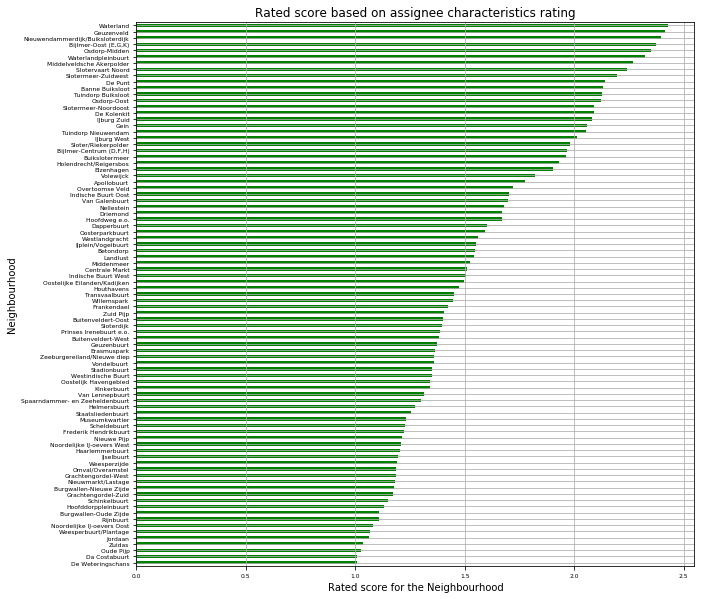

In [132]:
#Visualize rated score
score_sorted.set_index('Neighbourhood')['Score'].sort_values().plot(kind='barh', color="green",grid=True, figsize=(10,10),fontsize=6)
plt.xlabel('Rated score for the Neighbourhood')
plt.title('Rated score based on assignee characteristics rating')
plt.show()

#### 5. Conclusion

With our analysis we are able to identify neighbourhoods with a good fit with the wishes from the international assignee who wants to fins a place to live in Amsterdam. We have for this example collected the input from a random assigne. The ratings of importance this assignee gave to the different characteristics of a neighbourhood are reported below. The concluding overview is based on these ratings.

In [136]:
print('The random assignee gave the following ratings of importance (on a scale of 5):')
print('Importance to live in a busy area: '+str(busy_rating))
print('Importance to live in an area with health facilities: '+str(healthy_rating))
print('Importance to live in an area nearby the harbour: '+str(harbor_rating))
print('Importance to live in a lively(shops etc) area: '+str(lively_rating))
print('Importance to live in a quiet area: '+str(quiet_rating))
print('Importance to live in a safe area: '+str(safety_rating))
print('Importance to live in an area with a lot of children: '+str(children_rating))
print('Importance to live in an area with a low population density: '+str(population_rating))
print('Importance to live in an area with a low house density: '+str(house_rating))


The random assignee gave the following ratings of importance (on a scale of 5):
Importance to live in a busy area: 0
Importance to live in an area with health facilities: 2
Importance to live in an area nearby the harbour: 0
Importance to live in a lively(shops etc) area: 0
Importance to live in a quiet area: 0
Importance to live in a safe area: 5
Importance to live in an area with a lot of children: 5
Importance to live in an area with a low poulation density: 4
Importance to live in an area with a low house density: 4


In [137]:
index = score_sorted.index.values
df_top5 = AdamData_final.iloc[[index[0],index[1],index[2],index[3],index[4]],:]
df_top5

,Borough,Neighbourhood,Year,Population_Total,Population_Density,HouseHolds_with_Children_Percentage,House_Density,SAFETY_INDEX,LNG,LAT
NeighbourhoodID,,,,,,,,,,
N73,N Noord,Waterland,2020.0,2378.0,98.0,38.7,37.0,103.0,4.979187,52.392644
F78,F Nieuw-West,Geuzenveld,2020.0,16535.0,12568.0,40.5,4746.0,146.0,4.802849,52.378967
N64,N Noord,Nieuwendammerdijk/Buiksloterdijk,2020.0,1659.0,4716.0,46.6,1788.0,127.0,4.932702,52.393161
T94,T Zuidoost,"Bijlmer-Oost (E,G,K)",2020.0,29788.0,8047.0,32.1,3512.0,164.0,4.975828,52.318494
F82,F Nieuw-West,Osdorp-Midden,2020.0,15712.0,15150.0,36.5,6379.0,149.0,4.794732,52.356743


In [138]:
# make a map of Amsterdam using folium
map = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough in zip(df_top5['LAT'], df_top5['LNG'], df_top5['Neighbourhood']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

**5.1. Outcome for our random assignee**   
As you can see in the overview above, the neighbourhoods with the best fit given the input from our random assignee are particularly outside the Amsterdam centre area. This seems to be a perfect fit with the importance this assignee gave to the different characteristics a neighbourhood should have. This random assignee was looking for a save and quiet neighbourhood, with a high percentage of children and a low density of houses and population. This are typically the areas outside the centre, which is indeed depicted in above overview.